In [1]:
import nbformat
import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import spearmanr

In [2]:
directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/Movement_CompletedSteps_SimplePie/'

In [3]:
final_df=pd.read_csv('SimplePie_MS_PerStep.csv')

In [4]:
filtered_addcinnamon = final_df[final_df['Step'].str.strip() == 'Add cinnamon']
filtered_addcinnamon

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
4,C002,28,Add cinnamon,176.543370,222.538848,255.328186,240.098530,281.452259,598.823083,455.591867,358.320554
15,C004,30,Add cinnamon,69.706134,157.902359,52.486875,68.742924,38.483365,367.670139,0.000000,194.082550
26,C005,46,Add cinnamon,393.566572,853.433980,730.035698,706.564382,3841.270968,1089.391433,707.497659,889.320691
37,C010,54,Add cinnamon,348.746848,372.007400,501.848924,407.545462,664.185906,867.412548,639.626106,485.916721
50,C014,32,Add cinnamon,112.372573,141.774113,227.713051,202.633559,369.344525,696.602321,556.001817,359.498240
61,C015,33,Add cinnamon,136.076275,172.340377,149.753145,146.064752,152.876623,362.359136,267.695037,194.382029
72,C018,50,Add cinnamon,64.326650,116.648961,69.380677,66.791835,89.819210,371.295480,282.942319,183.458120
83,C019,40,Add cinnamon,242.023597,314.452562,627.743619,422.422681,882.320816,1030.672886,567.649296,363.854230
94,C022,32,Add cinnamon,130.481410,186.332860,178.961547,175.011948,155.481596,402.632871,281.499340,225.244273
105,C023,52,Add cinnamon,75.620822,100.327400,135.944699,111.642167,145.363306,210.459596,138.528195,113.452079


In [5]:
from sklearn.impute import KNNImputer
import numpy as np

filtered_addcinnamon = filtered_addcinnamon.copy()
imputer = KNNImputer(n_neighbors=1)

numerical_cols = filtered_addcinnamon.select_dtypes(include=['float64', 'int64']).columns
filtered_addcinnamon[numerical_cols] = filtered_addcinnamon[numerical_cols].replace(0, np.nan)

filtered_addcinnamon[numerical_cols] = imputer.fit_transform(filtered_addcinnamon[numerical_cols])
filtered_addcinnamon

,Participant,Block Design Raw Score,Step,Chest Distance,HeadCamera Distance,LeftElbow Distance,LeftShoulder Distance,MotionControllerLeft Distance,MotionControllerRight Distance,RightElbow Distance,RightShoulder Distance
4,C002,28.0,Add cinnamon,176.543370,222.538848,255.328186,240.098530,281.452259,598.823083,455.591867,358.320554
15,C004,30.0,Add cinnamon,69.706134,157.902359,52.486875,68.742924,38.483365,367.670139,282.942319,194.082550
26,C005,46.0,Add cinnamon,393.566572,853.433980,730.035698,706.564382,3841.270968,1089.391433,707.497659,889.320691
37,C010,54.0,Add cinnamon,348.746848,372.007400,501.848924,407.545462,664.185906,867.412548,639.626106,485.916721
50,C014,32.0,Add cinnamon,112.372573,141.774113,227.713051,202.633559,369.344525,696.602321,556.001817,359.498240
61,C015,33.0,Add cinnamon,136.076275,172.340377,149.753145,146.064752,152.876623,362.359136,267.695037,194.382029
72,C018,50.0,Add cinnamon,64.326650,116.648961,69.380677,66.791835,89.819210,371.295480,282.942319,183.458120
83,C019,40.0,Add cinnamon,242.023597,314.452562,627.743619,422.422681,882.320816,1030.672886,567.649296,363.854230
94,C022,32.0,Add cinnamon,130.481410,186.332860,178.961547,175.011948,155.481596,402.632871,281.499340,225.244273
105,C023,52.0,Add cinnamon,75.620822,100.327400,135.944699,111.642167,145.363306,210.459596,138.528195,113.452079


In [6]:
new_column_names = {
    'Chest Distance': 'Chest Distance - Add Cinnamon',
    'HeadCamera Distance': 'HeadCamera Distance - Add Cinnamon',
    'LeftElbow Distance': 'LeftElbow Distance - Add Cinnamon',
    'LeftShoulder Distance': 'LeftShoulder Distance - Add Cinnamon',
    'MotionControllerLeft Distance': 'MotionControllerLeft Distance - Add Cinnamon',
    'MotionControllerRight Distance': 'MotionControllerRight Distance - Add Cinnamon',
    'RightElbow Distance': 'RightElbow Distance - Add Cinnamon',
    'RightShoulder Distance': 'RightShoulder Distance - Add Cinnamon'
}

# Rename columns
filtered_addcinnamon = filtered_addcinnamon.rename(columns=new_column_names)
filtered_addcinnamon

,Participant,Block Design Raw Score,Step,Chest Distance - Add Cinnamon,HeadCamera Distance - Add Cinnamon,LeftElbow Distance - Add Cinnamon,LeftShoulder Distance - Add Cinnamon,MotionControllerLeft Distance - Add Cinnamon,MotionControllerRight Distance - Add Cinnamon,RightElbow Distance - Add Cinnamon,RightShoulder Distance - Add Cinnamon
4,C002,28.0,Add cinnamon,176.543370,222.538848,255.328186,240.098530,281.452259,598.823083,455.591867,358.320554
15,C004,30.0,Add cinnamon,69.706134,157.902359,52.486875,68.742924,38.483365,367.670139,282.942319,194.082550
26,C005,46.0,Add cinnamon,393.566572,853.433980,730.035698,706.564382,3841.270968,1089.391433,707.497659,889.320691
37,C010,54.0,Add cinnamon,348.746848,372.007400,501.848924,407.545462,664.185906,867.412548,639.626106,485.916721
50,C014,32.0,Add cinnamon,112.372573,141.774113,227.713051,202.633559,369.344525,696.602321,556.001817,359.498240
61,C015,33.0,Add cinnamon,136.076275,172.340377,149.753145,146.064752,152.876623,362.359136,267.695037,194.382029
72,C018,50.0,Add cinnamon,64.326650,116.648961,69.380677,66.791835,89.819210,371.295480,282.942319,183.458120
83,C019,40.0,Add cinnamon,242.023597,314.452562,627.743619,422.422681,882.320816,1030.672886,567.649296,363.854230
94,C022,32.0,Add cinnamon,130.481410,186.332860,178.961547,175.011948,155.481596,402.632871,281.499340,225.244273
105,C023,52.0,Add cinnamon,75.620822,100.327400,135.944699,111.642167,145.363306,210.459596,138.528195,113.452079


In [7]:
tracker_columns = ['Chest Distance - Add Cinnamon', 'HeadCamera Distance - Add Cinnamon', 'LeftElbow Distance - Add Cinnamon', 'LeftShoulder Distance - Add Cinnamon',
                   'RightElbow Distance - Add Cinnamon', 'RightShoulder Distance - Add Cinnamon', 'MotionControllerLeft Distance - Add Cinnamon',
                   'MotionControllerRight Distance - Add Cinnamon']
block_design_col = 'Block Design Raw Score'

# Function to calculate and display correlation for each tracker
def calculate_correlations(filtered_addcinnamon, tracker_columns, block_design_col):
    correlations = []
    for tracker_col in tracker_columns:
        # Calculate Spearman correlation and p-value without any filtering
        correlation, p_value = spearmanr(filtered_addcinnamon[block_design_col], filtered_addcinnamon[tracker_col])
        correlations.append({
            'Tracker': tracker_col,
            'Correlation': correlation,
            'P-value': p_value
        })
    corr_df = pd.DataFrame(correlations)
    return corr_df

# Calculate and display correlations
correlation_df = calculate_correlations(filtered_addcinnamon, tracker_columns, block_design_col)
correlation_df

,Tracker,Correlation,P-value
0,Chest Distance - Add Cinnamon,0.133554,0.648985
1,HeadCamera Distance - Add Cinnamon,0.006608,0.982113
2,LeftElbow Distance - Add Cinnamon,0.123348,0.674407
3,LeftShoulder Distance - Add Cinnamon,0.101322,0.730354
4,RightElbow Distance - Add Cinnamon,0.072767,0.804744
5,RightShoulder Distance - Add Cinnamon,0.008811,0.976153
6,MotionControllerLeft Distance - Add Cinnamon,0.125551,0.668892
7,MotionControllerRight Distance - Add Cinnamon,0.022026,0.940422


In [8]:
#filtered_addcinnamon.to_csv('SimplePie_AddCinnamon.csv',index=False)

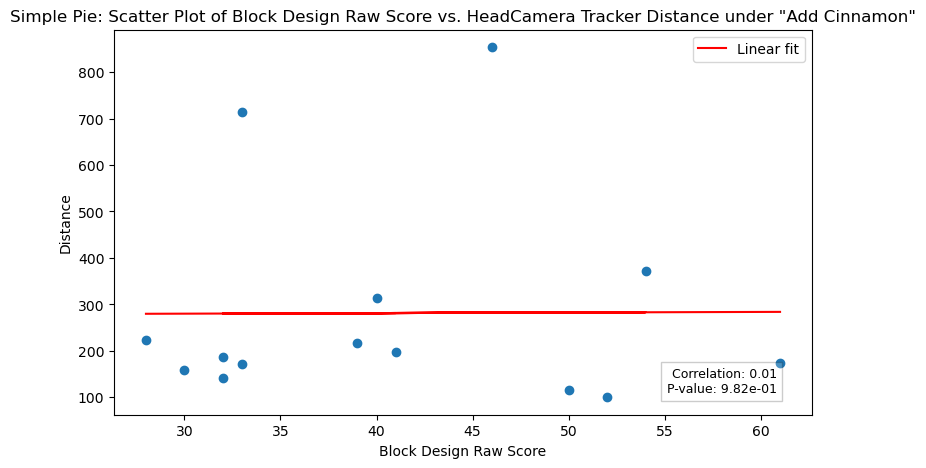

In [9]:
correlation, p_value = spearmanr(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['HeadCamera Distance - Add Cinnamon'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['HeadCamera Distance - Add Cinnamon'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['HeadCamera Distance - Add Cinnamon'], 1)
fit_line = slope * filtered_addcinnamon['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_addcinnamon['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. HeadCamera Tracker Distance under "Add Cinnamon"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '33 SP_CinnamonDistanceHeadCam.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

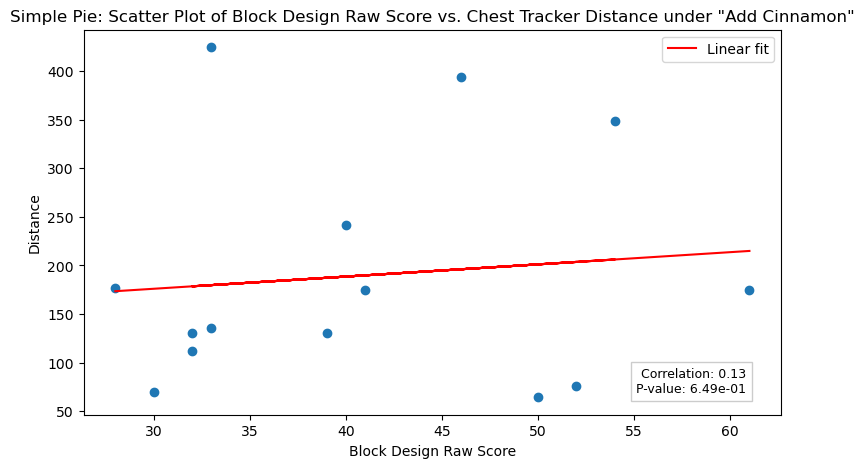

In [10]:
correlation, p_value = spearmanr(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['Chest Distance - Add Cinnamon'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['Chest Distance - Add Cinnamon'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['Chest Distance - Add Cinnamon'], 1)
fit_line = slope * filtered_addcinnamon['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_addcinnamon['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Chest Tracker Distance under "Add Cinnamon"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '34 SP_CinnamonDistanceChest.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

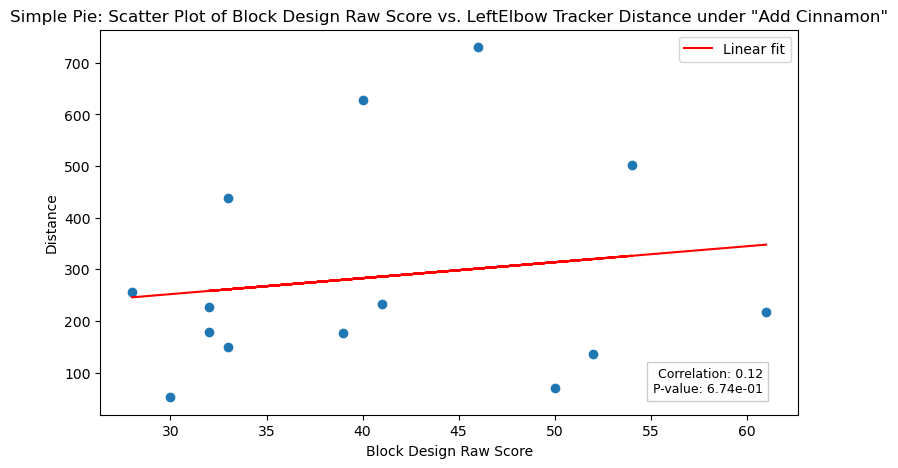

In [11]:
correlation, p_value = spearmanr(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['LeftElbow Distance - Add Cinnamon'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['LeftElbow Distance - Add Cinnamon'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['LeftElbow Distance - Add Cinnamon'], 1)
fit_line = slope * filtered_addcinnamon['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_addcinnamon['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. LeftElbow Tracker Distance under "Add Cinnamon"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '35 SP_CinnamonDistanceLeftElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

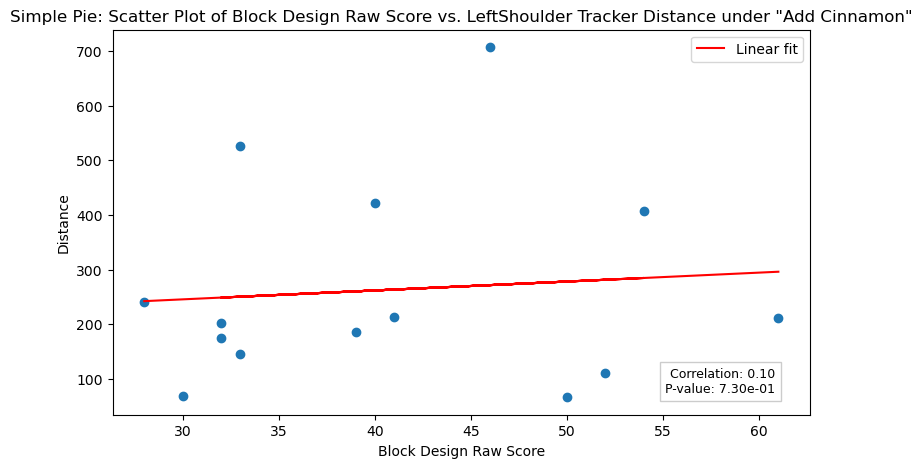

In [12]:
correlation, p_value = spearmanr(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['LeftShoulder Distance - Add Cinnamon'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['LeftShoulder Distance - Add Cinnamon'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['LeftShoulder Distance - Add Cinnamon'], 1)
fit_line = slope * filtered_addcinnamon['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_addcinnamon['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. LeftShoulder Tracker Distance under "Add Cinnamon"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '36 SP_CinnamonDistanceLeftShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

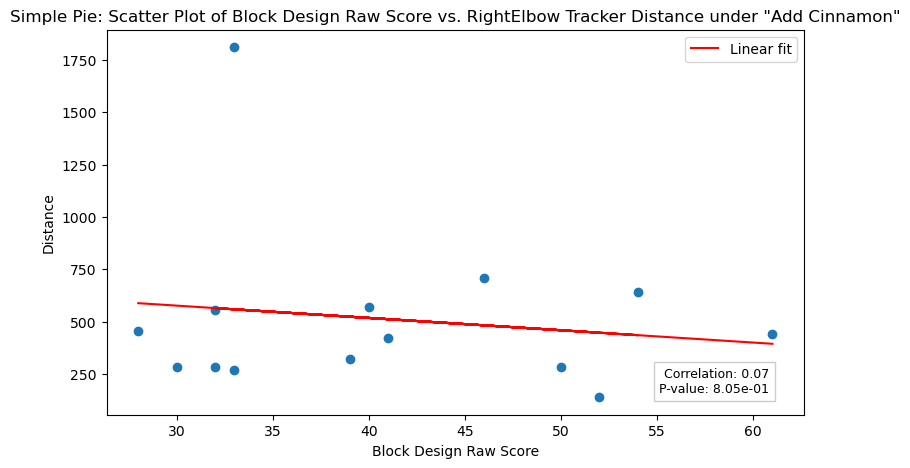

In [13]:
correlation, p_value = spearmanr(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['RightElbow Distance - Add Cinnamon'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['RightElbow Distance - Add Cinnamon'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['RightElbow Distance - Add Cinnamon'], 1)
fit_line = slope * filtered_addcinnamon['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_addcinnamon['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. RightElbow Tracker Distance under "Add Cinnamon"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '37 SP_CinnamonDistanceRightElbow.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

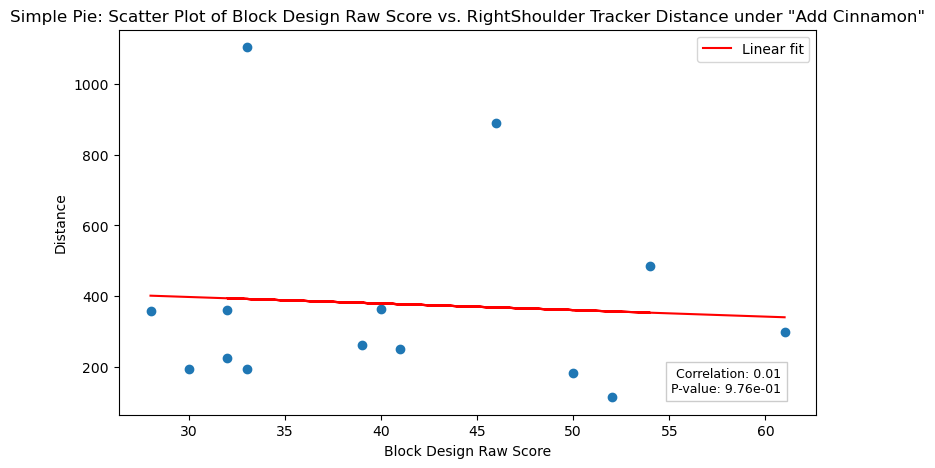

In [14]:
correlation, p_value = spearmanr(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['RightShoulder Distance - Add Cinnamon'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['RightShoulder Distance - Add Cinnamon'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['RightShoulder Distance - Add Cinnamon'], 1)
fit_line = slope * filtered_addcinnamon['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_addcinnamon['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. RightShoulder Tracker Distance under "Add Cinnamon"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '38 SP_CinnamonDistanceRightShdr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

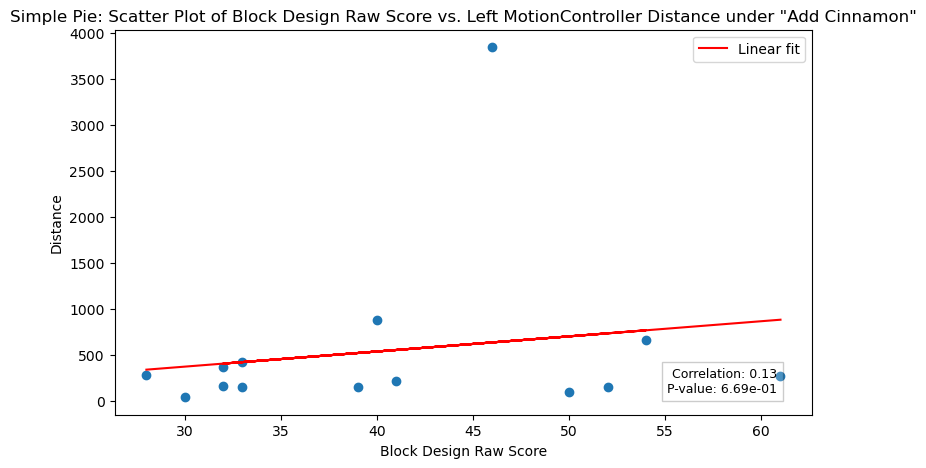

In [15]:
correlation, p_value = spearmanr(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['MotionControllerLeft Distance - Add Cinnamon'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['MotionControllerLeft Distance - Add Cinnamon'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['MotionControllerLeft Distance - Add Cinnamon'], 1)
fit_line = slope * filtered_addcinnamon['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_addcinnamon['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Left MotionController Distance under "Add Cinnamon"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '39 SP_CinnamonDistanceLeftContlr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()

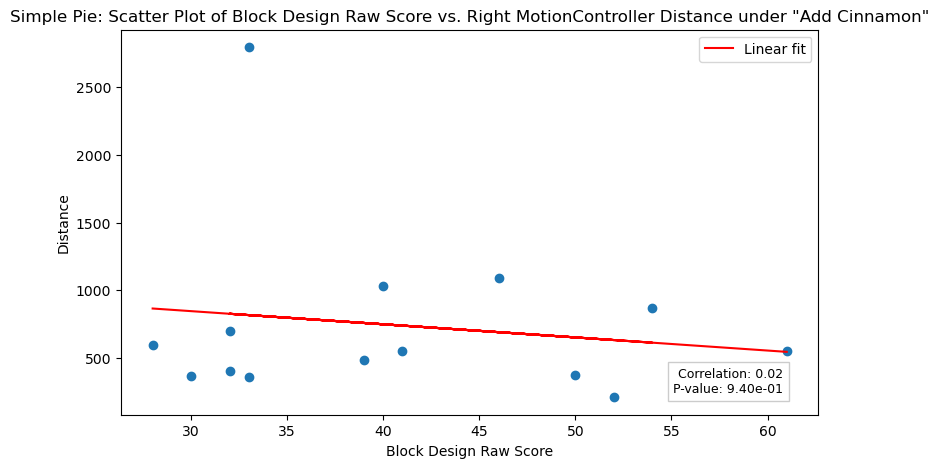

In [16]:
correlation, p_value = spearmanr(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['MotionControllerRight Distance - Add Cinnamon'])
plt.figure(figsize=(9,5))
plt.scatter(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['MotionControllerRight Distance - Add Cinnamon'])

# Calculate linear fit
slope, intercept = np.polyfit(filtered_addcinnamon['Block Design Raw Score'], filtered_addcinnamon['MotionControllerRight Distance - Add Cinnamon'], 1)
fit_line = slope * filtered_addcinnamon['Block Design Raw Score'] + intercept

# Plot linear fit
plt.plot(filtered_addcinnamon['Block Design Raw Score'], fit_line, color='red', label='Linear fit')

plt.text(0.95, 0.05, f'Correlation: {correlation:.2f}\nP-value: {p_value:.2e}', transform=plt.gca().transAxes,
         fontsize=9, verticalalignment='bottom', horizontalalignment='right', bbox=dict(facecolor='white', alpha=0.2))

plt.title('Simple Pie: Scatter Plot of Block Design Raw Score vs. Right MotionController Distance under "Add Cinnamon"')
plt.xlabel('Block Design Raw Score')
plt.ylabel('Distance')
#plt.ylim(100,310)
plt.legend()

directory = 'C:/Users/FANNY MARIA D SOUZA/Capstone_Movement/'
folder_path = os.path.join(directory, 'Plots_Movement/Scatterplot_SimplePie')


file_path = os.path.join(folder_path, '40 SP_CinnamonDistanceRightContlr.png')
plt.savefig(file_path, dpi=300, bbox_inches='tight')
plt.show()